#### Load and Explore Data

In [7]:
# Install required packages
!pip install wordcloud nltk seaborn scikit-learn vaderSentiment

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #ensur it's installed
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Check that necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')

# Create Sample dataset
students = [f"Student_{i}" for i in range (1, 52)]
courses = ["Math", "Science", "History", "English", "Computer Science"]
ratings = np.random.randint(1, 6, 51) #ratings between 1 & 5

# Sample diverse reviews for NLP analysis
reviews = [
    "The course content was very detailed and easy to follow.",
    "I struggled with the pacing; it was too fast.",
    "Great instructor! Very interactive and helpful.",
    "Too many assignments, but overall a good experience.",
    "I didn’t like the structure, it was confusing.",
    "The lectures were clear and engaging.",
    "The quizzes were too difficult and unrelated to the material.",
    "Very informative and well-organized.",
    "I wish there were more real-world examples.",
    "The assignments were repetitive and unhelpful.",
    "I enjoyed the discussions and peer interaction.",
    "The grading system was unclear and unfair.",
    "Excellent course! Highly recommended.",
    "Not enough depth in the subject matter.",
    "The course materials were outdated and not relevant.",
    "Very well structured, learned a lot.",
    "Too much theory, not enough practical application.",
    "The instructor provided great support and feedback.",
    "The course was okay, but could be improved.",
    "The exams were too easy, not challenging enough.",
]

# Create DataFrame
df = pd.DataFrame({
    "Student_ID": np.random.choice(students, 51),
    "Course": np.random.choice(courses, 51),
    "Rating": ratings,
    "Review_Text": np.random.choice(reviews, 51)
})

# Display dataset structure
df.info()
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\annmo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\annmo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Student_ID   51 non-null     object
 1   Course       51 non-null     object
 2   Rating       51 non-null     int32 
 3   Review_Text  51 non-null     object
dtypes: int32(1), object(3)
memory usage: 1.5+ KB


,Student_ID,Course,Rating,Review_Text
0,Student_3,Math,1,"Very well structured, learned a lot."
1,Student_13,History,5,The quizzes were too difficult and unrelated t...
2,Student_7,Science,1,The quizzes were too difficult and unrelated t...
3,Student_43,History,2,Very informative and well-organized.
4,Student_1,Computer Science,5,Great instructor! Very interactive and helpful.


### Sentiment Analysis using VADER

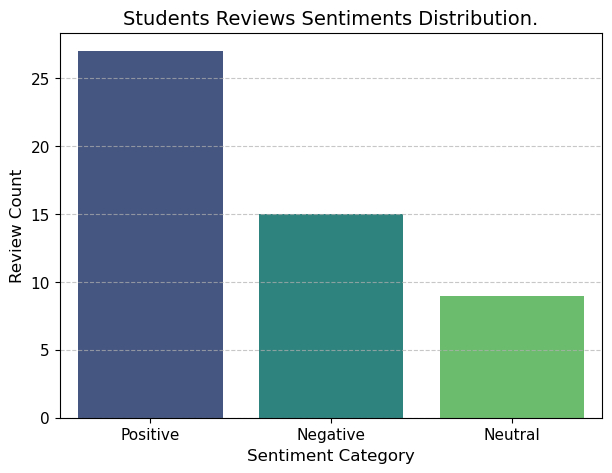

In [36]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Get sentiment scores
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Sentiment Analysis
df["Sentiment"] = df["Review_Text"].apply(get_sentiment)

# Sentiment distribution
plt.figure(figsize = (7, 5))
sns.countplot(x = df["Sentiment"], palette = "viridis", hue = df["Sentiment"], legend = False)
plt.title("Students Reviews Sentiments Distribution.", fontsize = 14)
plt.xlabel("Sentiment Category", fontsize = 12)
plt.ylabel("Review Count", fontsize = 12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) #better readability
plt.show()

### 'Frequently Used' Word Cloud

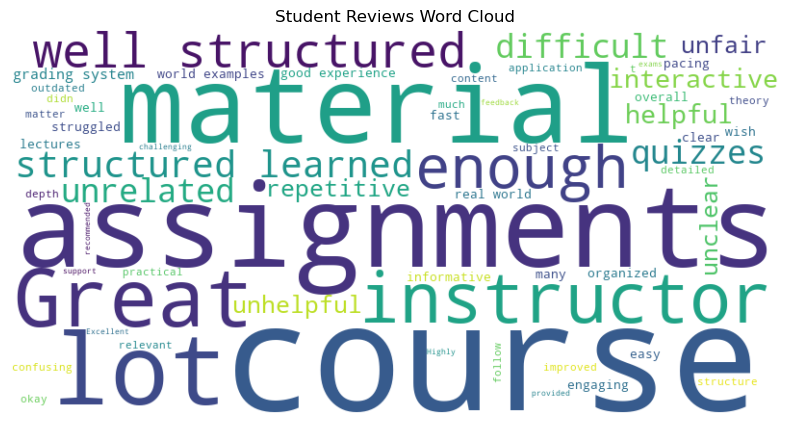

In [39]:
# Combine all reviews into a single txt
text = " ".join(review for review in df.Review_Text)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Student Reviews Word Cloud")
plt.show()

C:\Users\annmo\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


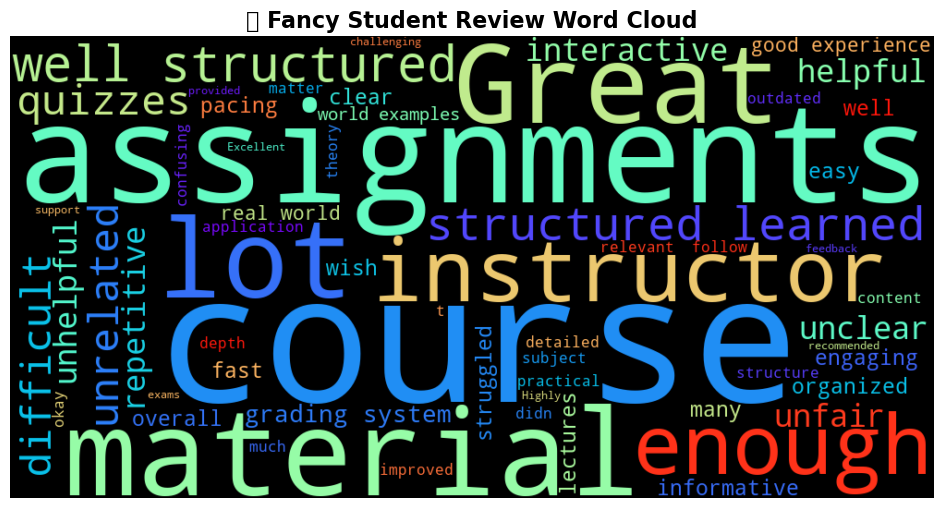

In [57]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# ✅ Combine all review text
text = " ".join(review for review in df["Review_Text"])

# ✅ Load a custom shape for the word cloud (Optional)
# Example: Use a graduation cap image (Ensure the path is correct)
# mask_image = np.array(Image.open("graduation_cap.png"))  # Replace with your own image

# ✅ Create a fancier word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="black",  # Change to "white" or a gradient
    colormap="rainbow", 
    max_words=100,
    contour_color="gold",  # Optional: Adds a border color
    contour_width=2,
    font_path=None,  # Add a custom font path if desired
    mask=None  # Replace with `mask=mask_image` for a custom shape
).generate(text)

# ✅ Display the fancy word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes for cleaner visualization
plt.title("🎨 Fancy Student Review Word Cloud", fontsize=16, fontweight="bold")
plt.show()


### Keyword & Theme Extraction (Most Important Words)

In [66]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words= "english")
tfidf_matrix = vectorizer.fit_transform(df["Review_Text"])

# Convert to df
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())

# Show top words based on TF-IDF
tfidf_df.mean().sort_values(ascending = False).head(10)

assignments    0.065536
structured     0.056603
learned        0.056603
lot            0.056603
course         0.054820
repetitive     0.047395
unhelpful      0.047395
great          0.045285
instructor     0.045285
grading        0.045282
dtype: float64

### Sentiment Analysis by Course

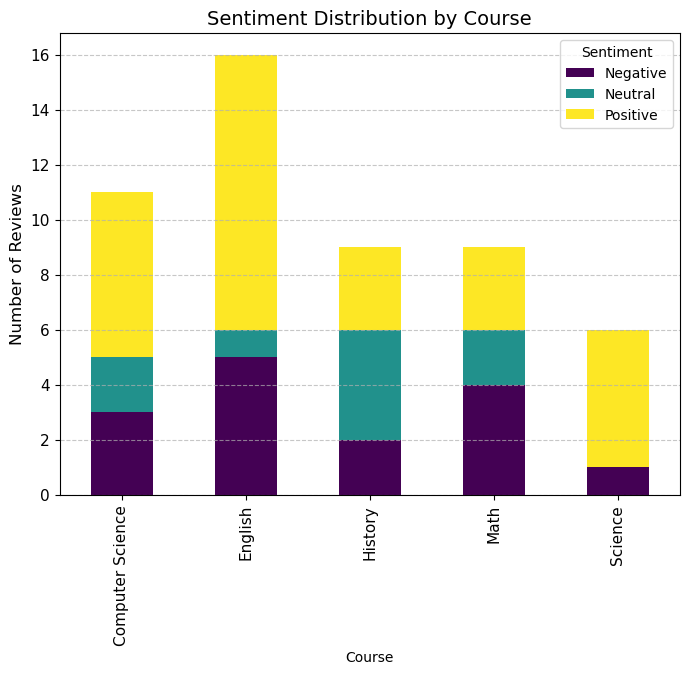

In [103]:
# Group sentiments by course
course_sentiment = df.groupby("Course")["Sentiment"].value_counts().unstack().fillna(0)

# Plot Sentiment Distribution per Course
course_sentiment.plot(kind = "bar", stacked = True, figsize= (8, 6), colormap = "viridis")
plt.title("Sentiment Distribution by Course", fontsize = 14)
plt.xlabel("Course")
plt.ylabel("Number of Reviews", fontsize = 12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) #better readability
plt.legend(title = "Sentiment")

plt.show()

### Predicting Sentiment Analysis Using Machine Learning (ML)

In [99]:
# Encode sentiment labels
df["Sentiment_Label"] = df["Sentiment"].map({"Positive": 1, "Neutral": 0, "Negative": -1})

# Convert texts to TF-IDF  vectors
X = vectorizer.fit_transform(df["Review_Text"])
y = df["Sentiment_Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         6

    accuracy                           0.82        11
   macro avg       0.92      0.78      0.79        11
weighted avg       0.86      0.82      0.79        11

